In [9]:
from google.colab import files
uploaded = files.upload()

Saving College.csv to College (2).csv


In [10]:

import pandas as pd

college = pd.read_csv("College.csv")
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [11]:
college2 = pd.read_csv("College.csv")
college3 = college2.rename({"Unnamed: 0": "College"}, axis = 1) # "Unnamed: 0" change to "College"
college3 = college3.set_index("College")
college3["Grad.Rate"] = college3["Grad.Rate"].clip(upper=100) # Percentage not more than 100
college = college3

In [13]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.440154
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.118804
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.000000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.000000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.000000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.000000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,100.000000


In [14]:
college=college3


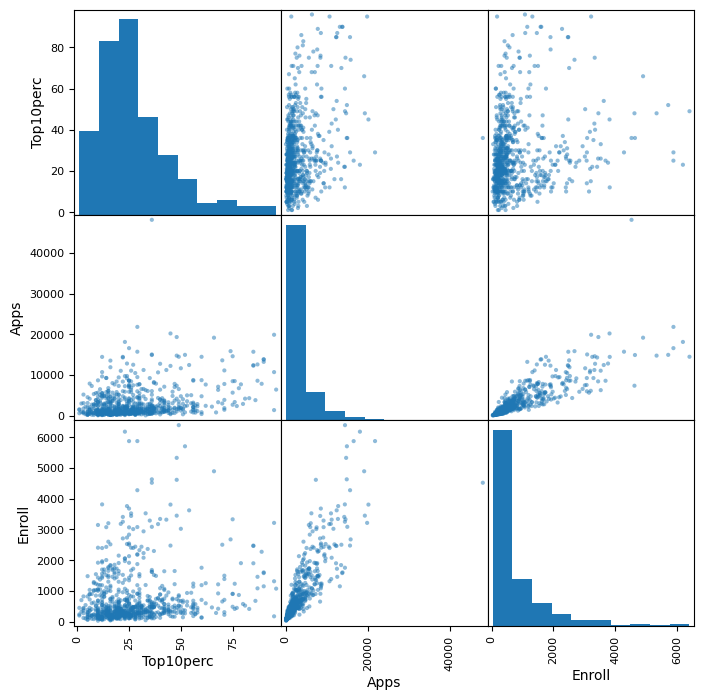

In [15]:

import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(college[["Top10perc", "Apps", "Enroll"]], figsize=(8,8))
plt.show()

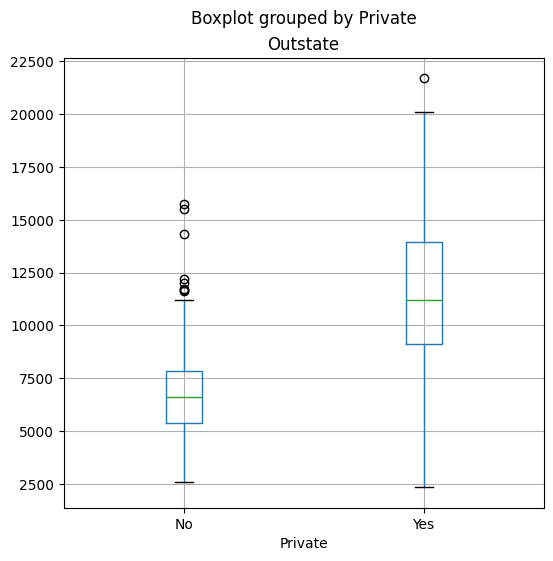

In [16]:

college.boxplot(column="Outstate", by="Private", figsize=(6,6))
plt.show()

Elite
No     699
Yes     78
Name: count, dtype: int64


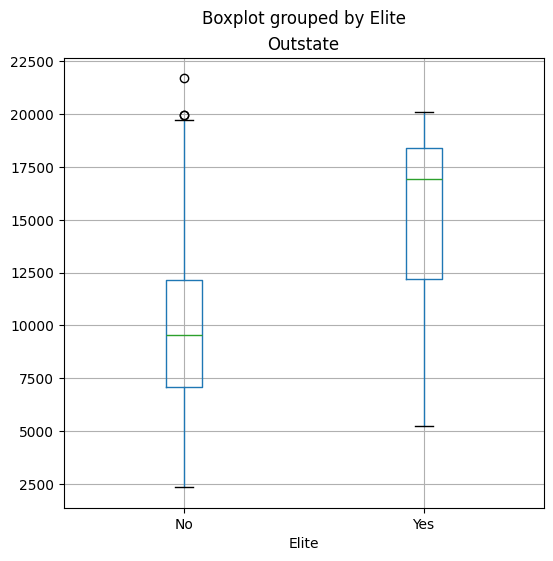

In [17]:
college["Elite"] = pd.cut(college["Top10perc"]/100, [0,0.5,1], labels=["No","Yes"])
print(college["Elite"].value_counts())

college.boxplot(column="Outstate", by="Elite", figsize=(6,6))
plt.show()


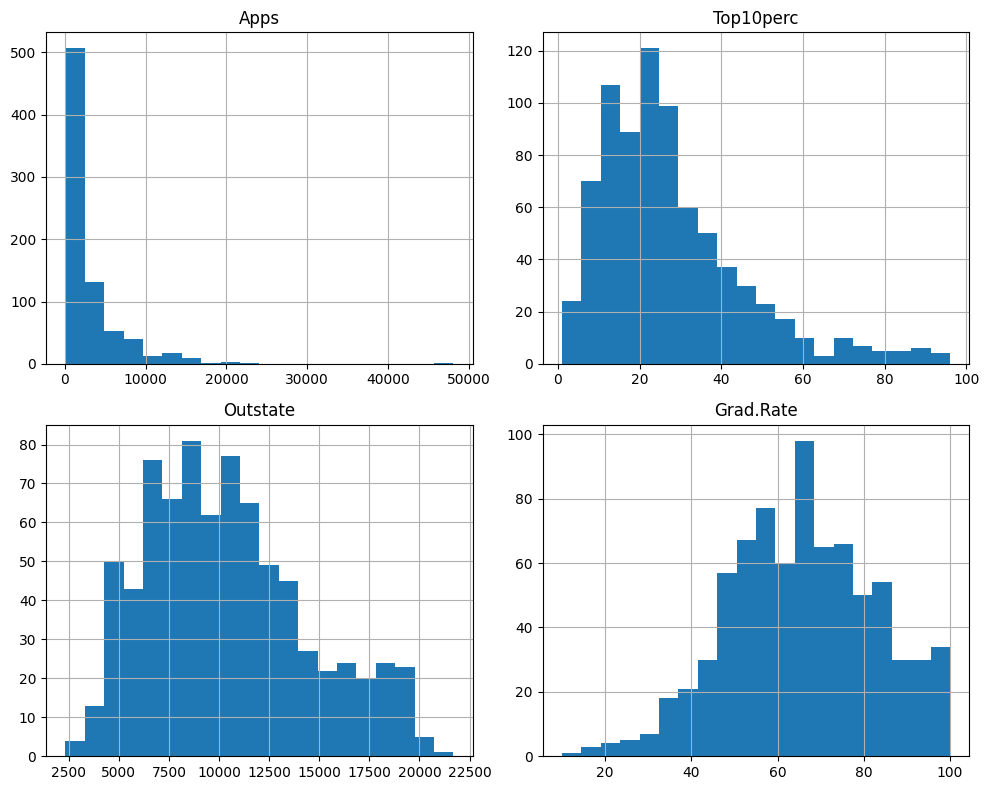

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(10,8))

college["Apps"].hist(bins=20, ax=axs[0,0])
axs[0,0].set_title("Apps")

college["Top10perc"].hist(bins=20, ax=axs[0,1])
axs[0,1].set_title("Top10perc")

college["Outstate"].hist(bins=20, ax=axs[1,0])
axs[1,0].set_title("Outstate")

college["Grad.Rate"].hist(bins=20, ax=axs[1,1])
axs[1,1].set_title("Grad.Rate")

plt.tight_layout()
plt.show()